# 11 API Requests
- Author: Addán Isaí Cruz Cruz
- Date: 08/29/2025
- Goal: Learn and practice API Requests

In [4]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()

True

In [34]:
#https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m
url = 'https://api.open-meteo.com/v1/forecast'
params = {
    'latitude':40.805550,
    'longitude':-74.100596,
    'past_days':10,
    'hourly':'temperature_2m,relative_humidity_2m,wind_speed_10m'
    }
response = requests.get(url,params=params)
if response.status_code == 200:
    data = response.json()
    print(f'Data retrive succesfully: {data.keys()}')
else:
    print(f'Error: {response.status_code}')

Data retrive succesfully: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


In [35]:
data

{'latitude': 40.81578,
 'longitude': -74.10395,
 'generationtime_ms': 6.240487098693848,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 6.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'wind_speed_10m': 'km/h'},
 'hourly': {'time': ['2025-08-20T00:00',
   '2025-08-20T01:00',
   '2025-08-20T02:00',
   '2025-08-20T03:00',
   '2025-08-20T04:00',
   '2025-08-20T05:00',
   '2025-08-20T06:00',
   '2025-08-20T07:00',
   '2025-08-20T08:00',
   '2025-08-20T09:00',
   '2025-08-20T10:00',
   '2025-08-20T11:00',
   '2025-08-20T12:00',
   '2025-08-20T13:00',
   '2025-08-20T14:00',
   '2025-08-20T15:00',
   '2025-08-20T16:00',
   '2025-08-20T17:00',
   '2025-08-20T18:00',
   '2025-08-20T19:00',
   '2025-08-20T20:00',
   '2025-08-20T21:00',
   '2025-08-20T22:00',
   '2025-08-20T23:00',
   '2025-08-21T00:00',
   '2025-08-21T01:00',
   '2025-08-21T02:00',
   '2025-08-21T03:00',
   '2025-08-21T04:00',
   '2

In [36]:
df_wheater = pd.DataFrame(data['hourly'])
df_wheater['time'] = pd.to_datetime(df_wheater['time'])
df_wheater = df_wheater.set_index('time')
df_wheater


,temperature_2m,relative_humidity_2m,wind_speed_10m
time,,,
2025-08-20 00:00:00,21.0,51,12.4
2025-08-20 01:00:00,20.1,59,10.2
2025-08-20 02:00:00,19.8,59,9.0
2025-08-20 03:00:00,19.5,62,10.8
2025-08-20 04:00:00,18.7,68,8.7
...,...,...,...
2025-09-05 19:00:00,22.2,39,12.5
2025-09-05 20:00:00,23.0,39,14.8
2025-09-05 21:00:00,23.3,40,15.8


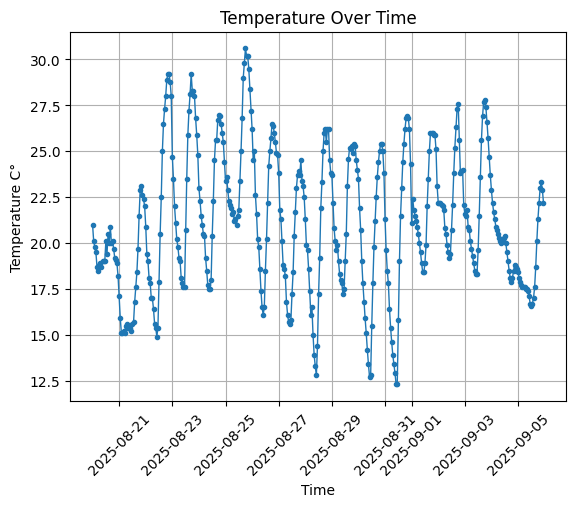

In [37]:
plt.plot(
    df_wheater.index, df_wheater['temperature_2m'],
    marker='o', linestyle='-', linewidth=1, markersize=3
    )
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature C°')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [49]:
#temperature_c, relative_humidity_pct, wind_speed_kmh
df_wheater = df_wheater.rename(columns={
    'temperature_2m':'temperature_C',
    'relative_humidity_2m':'relative_humidity_ptc',
    'wind_speed_10m':'wind_speed_kmh'
})

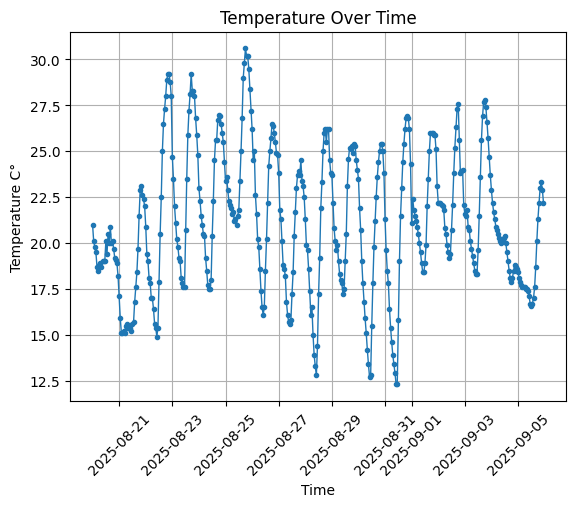

In [43]:
plt.plot(
    df_wheater.index, df_wheater['temperature_2m'],
    marker='o', linestyle='-', linewidth=1, markersize=3
    )
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature C°')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [50]:
df_wheater

,temperature_C,relative_humidity_ptc,wind_speed_kmh
time,,,
2025-08-20 00:00:00,21.0,51,12.4
2025-08-20 01:00:00,20.1,59,10.2
2025-08-20 02:00:00,19.8,59,9.0
2025-08-20 03:00:00,19.5,62,10.8
2025-08-20 04:00:00,18.7,68,8.7
...,...,...,...
2025-09-05 19:00:00,22.2,39,12.5
2025-09-05 20:00:00,23.0,39,14.8
2025-09-05 21:00:00,23.3,40,15.8


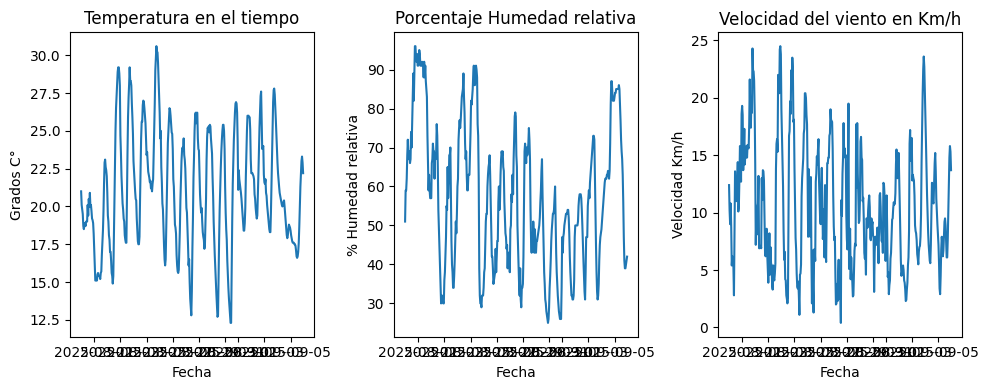

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].plot(df_wheater.index, df_wheater['temperature_C'])
axes[0].set_title('Temperatura en el tiempo')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Grados C°')
#axes[0].set_xticks(, rotation=45)


axes[1].plot(df_wheater.index, df_wheater['relative_humidity_ptc'])
axes[1].set_title('Porcentaje Humedad relativa')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('% Humedad relativa')

axes[2].plot(df_wheater.index, df_wheater['wind_speed_kmh'])
axes[2].set_title('Velocidad del viento en Km/h')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Velocidad Km/h')

plt.tight_layout() 
plt.show()

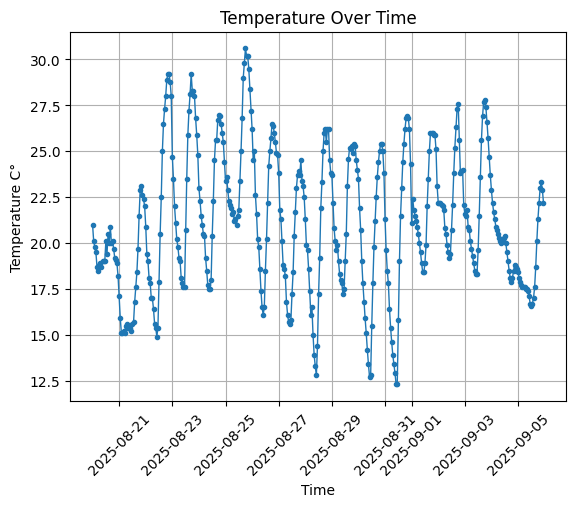

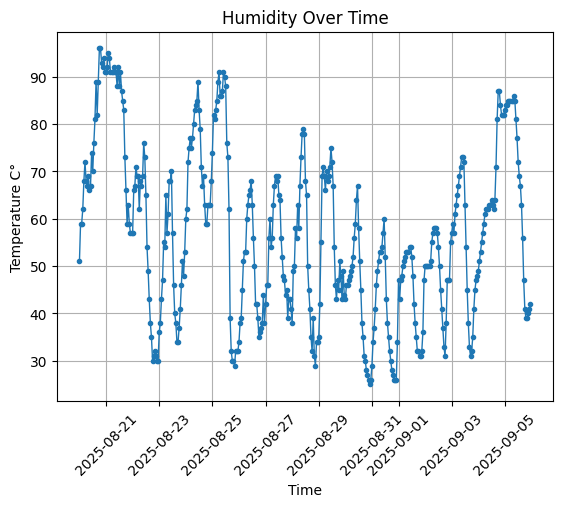

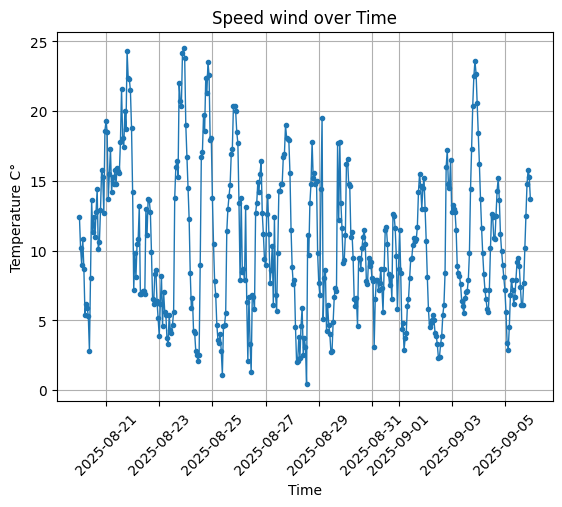

In [64]:
plt.plot(
    df_wheater.index, df_wheater['temperature_C'],
    marker='o', linestyle='-', linewidth=1, markersize=3
    )
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature C°')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.plot(
    df_wheater.index, df_wheater['relative_humidity_ptc'],
    marker='o', linestyle='-', linewidth=1, markersize=3
    )
plt.title('Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature C°')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.plot(
    df_wheater.index, df_wheater['wind_speed_kmh'],
    marker='o', linestyle='-', linewidth=1, markersize=3
    )
plt.title('Speed wind over Time')
plt.xlabel('Time')
plt.ylabel('Temperature C°')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [2]:
spotify_client = os.getenv('SPOTIFY_CLIENT')
spotify_secret = os.getenv('SPOTIFY_SECRET')

In [5]:
sp = spotipy.Spotify(
    auth_manager=SpotifyClientCredentials(
        client_id=spotify_client, client_secret=spotify_secret
        )
        )

In [8]:
result = sp.search(q='coldplay', limit=20)

for idx, track in enumerate(result['tracks']['items']):
    print(f'{idx} {track['name']}')

0 Yellow
1 Sparks
2 feelslikeimfallinginlove - Single Version
3 Viva La Vida
4 ALL MY LOVE
5 feelslikeimfallinginlove
6 A Sky Full of Stars
7 Something Just Like This
8 feelslikeimfallinginlove
9 The Scientist
10 Always in My Head
11 Clocks
12 feelslikeimfallinginlove - Zerb x Coldplay
13 Hymn for the Weekend
14 See You Soon
15 Adventure of a Lifetime
16 Paradise
17 ALL MY LOVE
18 🌈
19 Fix You
